In [39]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
import matplotlib.pyplot as plt


In [40]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2


In [54]:
data = yf.download('TSLA', start=start_date, end=end_date, progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())


          Date        Open        High         Low       Close   Adj Close  \
245 2024-05-20  177.559998  177.750000  173.520004  174.949997  174.949997   
246 2024-05-21  175.509995  186.880005  174.710007  186.600006  186.600006   
247 2024-05-22  182.850006  183.800003  178.119995  180.110001  180.110001   
248 2024-05-23  181.800003  181.899994  173.259995  173.740005  173.740005   
249 2024-05-24  174.839996  180.080002  173.729996  179.240005  179.240005   

        Volume  
245   61727400  
246  115266500  
247   88313500  
248   71975500  
249   65479700  


In [42]:
print(data.tail())


          Date        Open        High         Low       Close   Adj Close  \
245 2024-05-20  177.559998  177.750000  173.520004  174.949997  174.949997   
246 2024-05-21  175.509995  186.880005  174.710007  186.600006  186.600006   
247 2024-05-22  182.850006  183.800003  178.119995  180.110001  180.110001   
248 2024-05-23  181.800003  181.899994  173.259995  173.740005  173.740005   
249 2024-05-24  174.839996  180.080002  173.729996  179.240005  179.240005   

        Volume  
245   61727400  
246  115266500  
247   88313500  
248   71975500  
249   65479700  


In [43]:
data = data[["Date", "Close"]]
print(data.head())


        Date       Close
0 2023-05-30  201.160004
1 2023-05-31  203.929993
2 2023-06-01  207.520004
3 2023-06-02  213.970001
4 2023-06-05  217.610001


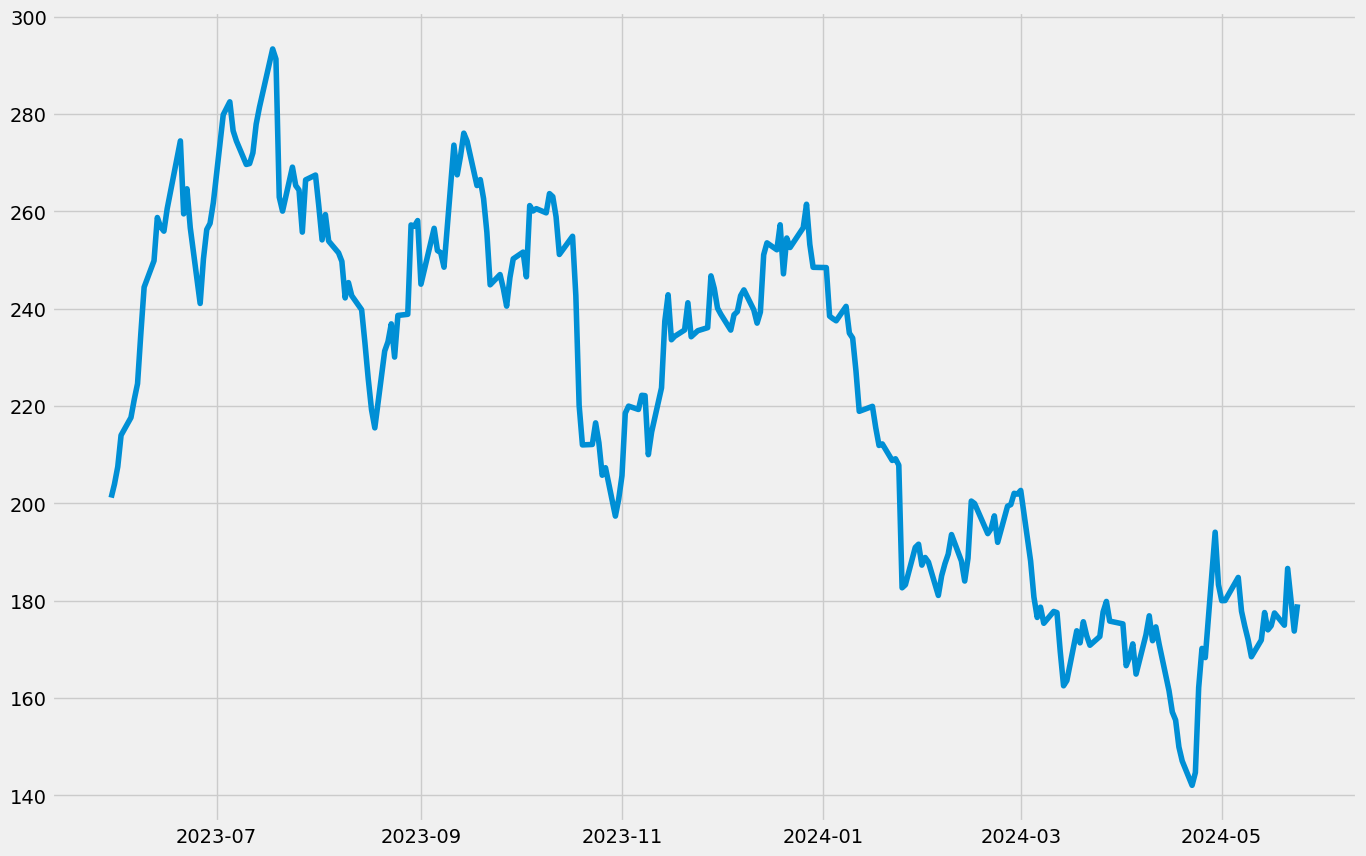

In [44]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])
plt.show()


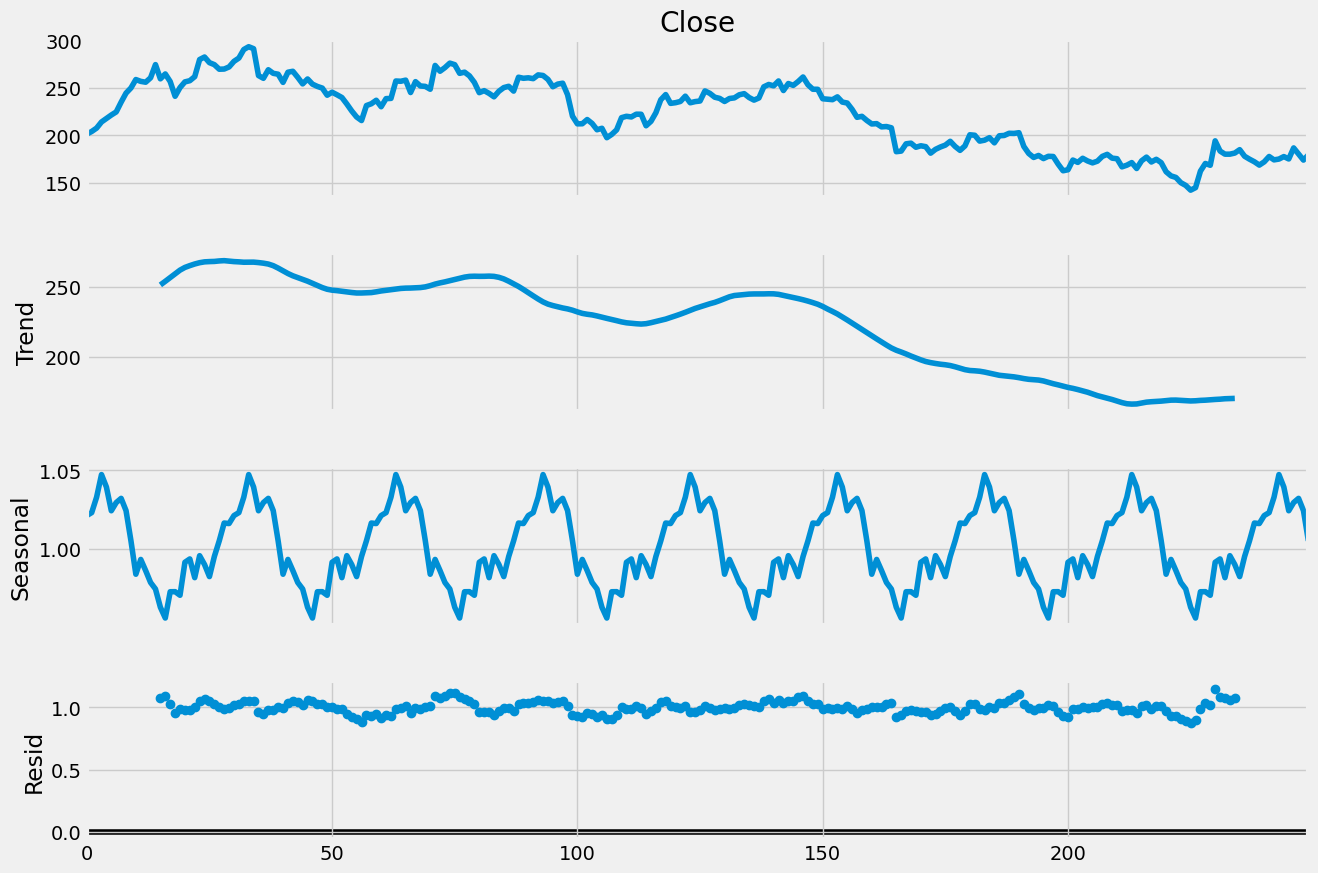

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



result = seasonal_decompose(data["Close"], model='multiplicative', period=30)

result.plot()


plt.gcf().set_size_inches(15, 10)

plt.show()


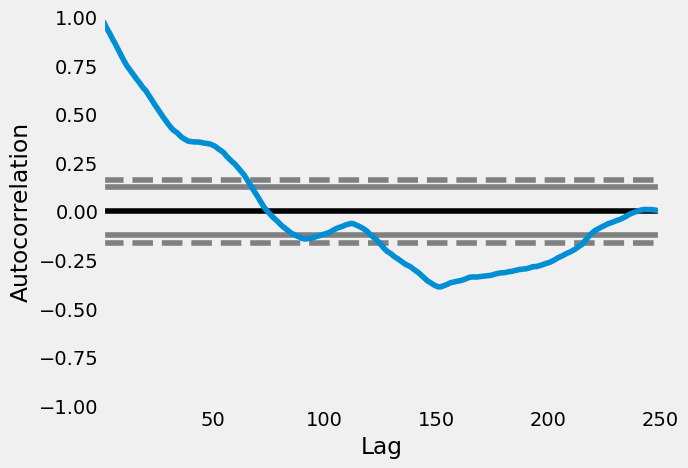

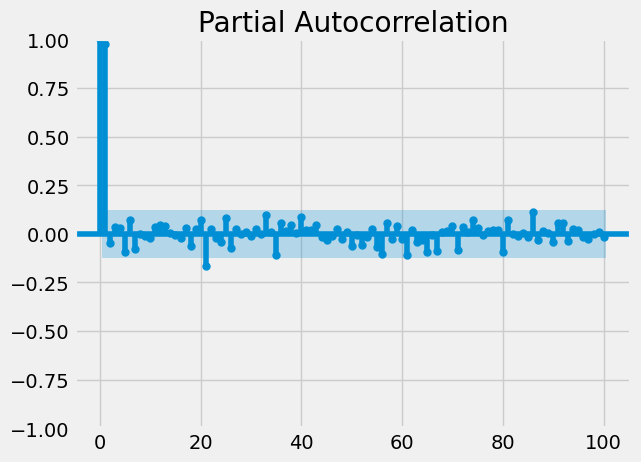

In [46]:
pd.plotting.autocorrelation_plot(data["Close"])
plt.show()
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)
plt.show()


In [47]:
train_data = data['Close'][:-15]
test_data = data['Close'][-15:]
print(train_data)
print(test_data)

# Définition des valeurs p, d, q
p, d, q = 6, 1, 6


0      201.160004
1      203.929993
2      207.520004
3      213.970001
4      217.610001
          ...    
230    194.050003
231    183.279999
232    179.990005
233    180.009995
234    181.190002
Name: Close, Length: 235, dtype: float64
235    184.759995
236    177.809998
237    174.720001
238    171.970001
239    168.470001
240    171.889999
241    177.550003
242    173.990005
243    174.839996
244    177.460007
245    174.949997
246    186.600006
247    180.110001
248    173.740005
249    179.240005
Name: Close, dtype: float64


In [48]:
from statsmodels.tsa.arima.model import ARIMA
model_A = ARIMA(train_data, order=(p,d,q))
fitted_A = model_A.fit()
# Affichage du résumé du modèle
print(fitted_A.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  235
Model:                 ARIMA(6, 1, 6)   Log Likelihood                -784.060
Date:                Sun, 26 May 2024   AIC                           1594.120
Time:                        14:59:26   BIC                           1639.039
Sample:                             0   HQIC                          1612.231
                                - 235                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1545      2.251      0.069      0.945      -4.258       4.567
ar.L2          0.9064      1.690      0.536      0.592      -2.406       4.219
ar.L3         -0.1103      0.621     -0.178      0.8

In [55]:
test_pred_A = fitted_A.predict(start=test_data.index[0], end=test_data.index[-1])
df_A = pd.DataFrame({"test_data": test_data, "test_pred_ARIMA": test_pred_A})
print(df_A)
print(test_pred_A)


      test_data  test_pred_ARIMA
235  184.759995       177.332196
236  177.809998       180.071570
237  174.720001       178.799648
238  171.970001       177.615845
239  168.470001       179.652945
240  171.889999       178.754371
241  177.550003       178.618185
242  173.990005       180.741631
243  174.839996       178.453395
244  177.460007       179.743125
245  174.949997       179.331704
246  186.600006       178.163134
247  180.110001       179.155814
248  173.740005       178.949903
249  179.240005       178.509902
235    177.332196
236    180.071570
237    178.799648
238    177.615845
239    179.652945
240    178.754371
241    178.618185
242    180.741631
243    178.453395
244    179.743125
245    179.331704
246    178.163134
247    179.155814
248    178.949903
249    178.509902
Name: predicted_mean, dtype: float64


In [50]:
df_A = pd.DataFrame({"test_data": test_data, "test_pred_ARIMA": test_pred_A})
print(df_A)


      test_data  test_pred_ARIMA
235  184.759995       177.332196
236  177.809998       180.071570
237  174.720001       178.799648
238  171.970001       177.615845
239  168.470001       179.652945
240  171.889999       178.754371
241  177.550003       178.618185
242  173.990005       180.741631
243  174.839996       178.453395
244  177.460007       179.743125
245  174.949997       179.331704
246  186.600006       178.163134
247  180.110001       179.155814
248  173.740005       178.949903
249  179.240005       178.509902


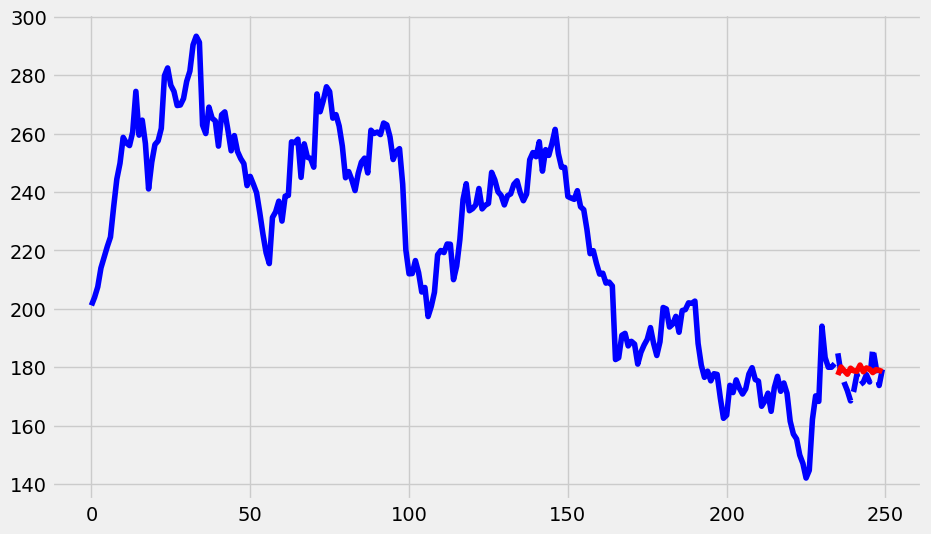

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(test_pred_A.index, test_pred_A, label='Prédictions (Test)', color='red')


In [53]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
model_S = sm.tsa.statespace.SARIMAX(data['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))
fitted_S = model_S.fit()
print(fitted_S.summary())


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(6, 1, 6)x(6, 1, 6, 12)   Log Likelihood                -807.988
Date:                            Sun, 26 May 2024   AIC                           1665.976
Time:                                    15:02:02   BIC                           1752.677
Sample:                                         0   HQIC                          1700.922
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1607      1.741     -0.092      0.926      -3.572       3.251
ar.L2         -0.2875      0.842   

In [61]:
test_pred_S = fitted_S.predict(start=test_data.index[0], end=test_data.index[-1])
df_S = pd.DataFrame({"test_data": test_data, "test_pred": test_pred_S})
# Affichage du DataFrame
print(df_S)
print(test_pred_S)





      test_data   test_pred
235  184.759995  180.524698
236  177.809998  187.564492
237  174.720001  178.689251
238  171.970001  173.968276
239  168.470001  172.754337
240  171.889999  168.051247
241  177.550003  175.484901
242  173.990005  175.231796
243  174.839996  172.062573
244  177.460007  173.068019
245  174.949997  178.041230
246  186.600006  175.183744
247  180.110001  190.212339
248  173.740005  180.073815
249  179.240005  173.359229
235    180.524698
236    187.564492
237    178.689251
238    173.968276
239    172.754337
240    168.051247
241    175.484901
242    175.231796
243    172.062573
244    173.068019
245    178.041230
246    175.183744
247    190.212339
248    180.073815
249    173.359229
Name: predicted_mean, dtype: float64


In [59]:
df_S = pd.DataFrame({"test_data": test_data, "test_pred": test_pred_S})
# Affichage du DataFrame
print(df_S)


      test_data   test_pred
235  184.759995  180.524698
236  177.809998  187.564492
237  174.720001  178.689251
238  171.970001  173.968276
239  168.470001  172.754337
240  171.889999  168.051247
241  177.550003  175.484901
242  173.990005  175.231796
243  174.839996  172.062573
244  177.460007  173.068019
245  174.949997  178.041230
246  186.600006  175.183744
247  180.110001  190.212339
248  173.740005  180.073815
249  179.240005  173.359229


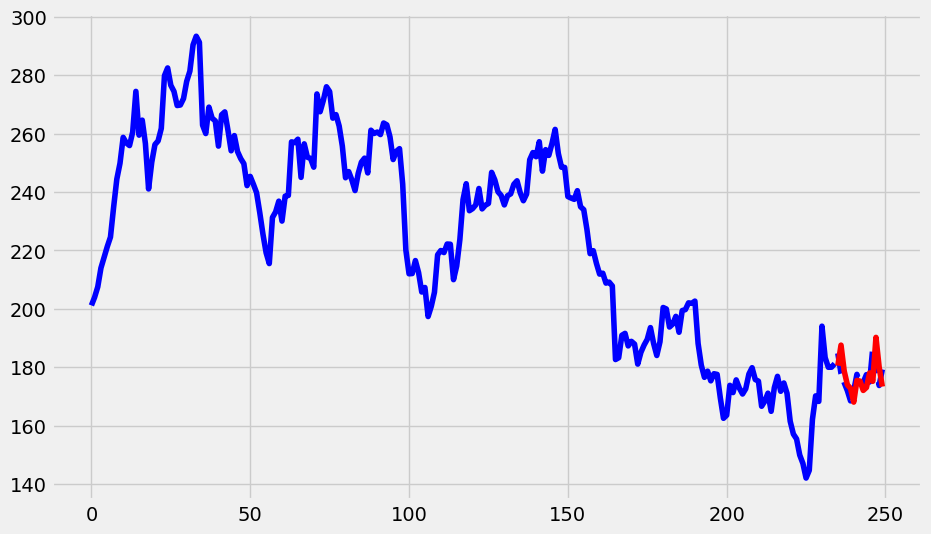

In [60]:
# Tracer les prédictions et les données réelles avec les courbes collées
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(test_pred_S.index, test_pred_S, label='Prédictions (Test)', color='red')


250    177.907780
251    173.335579
252    172.264885
253    175.687988
254    177.373081
255    173.758407
256    171.003090
257    173.385471
258    169.636337
259    169.895209
260    169.611745
261    173.832930
262    171.452927
263    171.508752
264    171.812852
265    171.664643
266    172.083148
267    169.323861
268    171.135649
269    169.114066
270    167.441847
Name: predicted_mean, dtype: float64


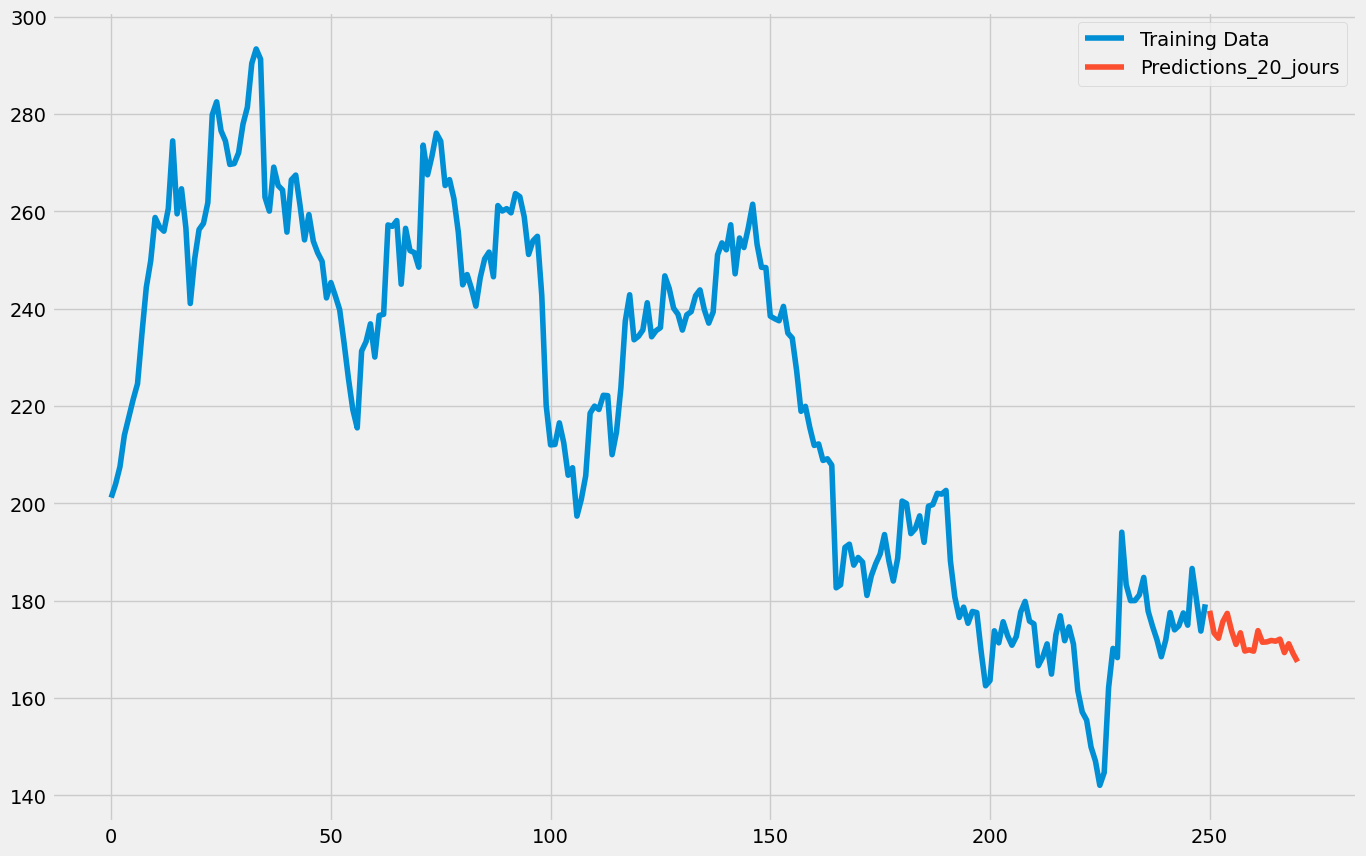

In [63]:
# Prédiction de stock des 20 prochains jours
prediction_20_jours = fitted_S.predict(len(data), len(data)+20)
print(prediction_20_jours)

# Graphe de prédiction de stock des 20 prochains jours
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
prediction_20_jours.plot(legend=True, label="Predictions_20_jours")
plt.show()


In [64]:
from joblib import dump
# Sauvegarde du modèle ARIMA
dump(fitted_A, 'ARIMA.joblib')
# Sauvegarde du modèle SARIMA
dump(fitted_S, 'SARIMA.joblib')

['SARIMA.joblib']